In [155]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [156]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [157]:
initial_data = yf.download("PFE", start="2020-03-01", end="2021-03-30")

[*********************100%***********************]  1 of 1 completed


In [158]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,32.172676,33.159393,31.736242,33.092979,31.773317,42034469
2020-03-03,33.377609,33.946869,32.125237,32.542694,31.244972,46174475
2020-03-04,33.301708,34.592030,33.159393,34.535103,33.157932,38712155
2020-03-05,33.823528,34.326378,33.358635,33.643265,32.301655,35096303
2020-03-06,32.922199,33.368122,32.371918,33.225807,31.900845,40931036


In [159]:
initial_data['Adj Close'].head()

Date
2020-03-02    31.773317
2020-03-03    31.244972
2020-03-04    33.157932
2020-03-05    32.301655
2020-03-06    31.900845
Name: Adj Close, dtype: float64

In [160]:
data =  initial_data['Adj Close']

In [161]:
data.head()

Date
2020-03-02    31.773317
2020-03-03    31.244972
2020-03-04    33.157932
2020-03-05    32.301655
2020-03-06    31.900845
Name: Adj Close, dtype: float64

In [162]:
data.tail()

Date
2021-03-23    35.360001
2021-03-24    35.610001
2021-03-25    35.669998
2021-03-26    36.250000
2021-03-29    36.619999
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

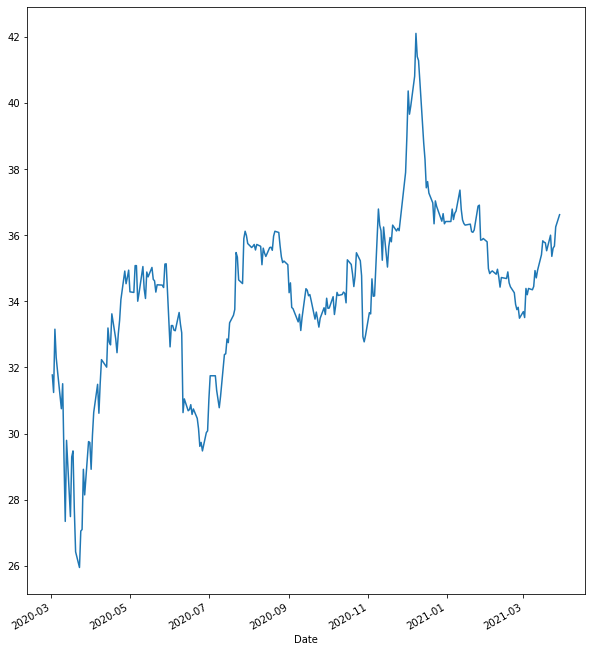

In [163]:
data.plot(figsize=(10, 12), subplots=True)

In [164]:
data.describe().round(2)

count    272.00
mean      34.21
std        2.56
min       25.95
25%       33.19
50%       34.47
75%       35.72
max       42.10
Name: Adj Close, dtype: float64

In [165]:
data.diff().head()

Date
2020-03-02         NaN
2020-03-03   -0.528345
2020-03-04    1.912960
2020-03-05   -0.856277
2020-03-06   -0.400810
Name: Adj Close, dtype: float64

In [166]:
data.diff().describe().round(2)

count    271.00
mean       0.02
std        0.69
min       -2.51
25%       -0.30
50%       -0.02
75%        0.31
max        2.63
Name: Adj Close, dtype: float64

In [167]:
data.pct_change().round(4).head()

Date
2020-03-02       NaN
2020-03-03   -0.0166
2020-03-04    0.0612
2020-03-05   -0.0258
2020-03-06   -0.0124
Name: Adj Close, dtype: float64

In [168]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

Date
2020-03-02       NaN
2020-03-03   -0.0168
2020-03-04    0.0594
2020-03-05   -0.0262
2020-03-06   -0.0125
Name: Adj Close, dtype: float64

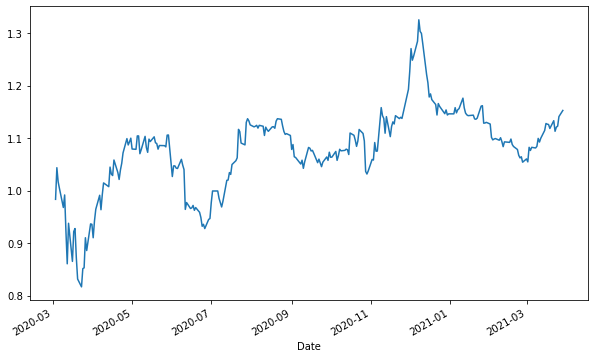

In [169]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [170]:
vol = np.sqrt(252) * rets.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 33.89 %


In [171]:
initial_data = yf.download("PFE", start="2020-09-30", end="2021-03-30")

[*********************100%***********************]  1 of 1 completed


In [172]:
initial_data['Adj Close'].head()

Date
2020-09-29    33.602013
2020-09-30    34.094383
2020-10-01    33.787815
2020-10-02    33.797104
2020-10-05    34.140835
Name: Adj Close, dtype: float64

In [173]:
data =  initial_data['Adj Close']

In [174]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

Date
2020-09-29       NaN
2020-09-30    0.0145
2020-10-01   -0.0090
2020-10-02    0.0003
2020-10-05    0.0101
Name: Adj Close, dtype: float64

In [175]:
vol = np.sqrt(252) * rets.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 25.57 %


In [176]:
vol = np.sqrt(52) * rets.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 11.61 %


In [177]:
import numpy as np
import os

In [178]:
S0 = 36.0              
K = 36.0               
T = 4/52                
r = 0.0173                 
sig = 0.1161               
N = 4                    
payoff = "put"          

In [179]:
dT = float(T) / N                             
u = np.exp(sig * np.sqrt(dT))                 
d = 1.0 / u                                   

In [180]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [181]:
S

array([[36.        , 36.58429726, 37.17807794, 37.78149597, 38.39470776],
       [ 0.        , 35.42503471, 36.        , 36.58429726, 37.17807794],
       [ 0.        ,  0.        , 34.85925233, 35.42503471, 36.        ],
       [ 0.        ,  0.        ,  0.        , 34.30250621, 34.85925233],
       [ 0.        ,  0.        ,  0.        ,  0.        , 33.75465203]])

In [182]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.5063082641871168

In [188]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.14074767],
       [0.        , 0.        , 0.        , 0.        , 2.24534797]])

In [189]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put', str(bpp))

Binary put 1.0


In [190]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.41082986, 0.13712723, 0.        , 0.        , 0.        ],
       [0.        , 0.691804  , 0.27785124, 0.        , 0.        ],
       [0.        , 0.        , 1.11680179, 0.56299036, 0.        ],
       [0.        , 0.        , 0.        , 1.68551886, 1.14074767],
       [0.        , 0.        , 0.        , 0.        , 2.24534797]])

In [191]:
print('European ' + payoff, str( V[0,0]))

European put 0.4108298625748808


In [192]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[0.41961489, 0.14004396, 0.        , 0.        , 0.        ],
       [0.        , 0.70661321, 0.28376119, 0.        , 0.        ],
       [0.        , 0.        , 1.14074767, 0.57496529, 0.        ],
       [0.        , 0.        , 0.        , 1.69749379, 1.14074767],
       [0.        , 0.        , 0.        , 0.        , 2.24534797]])

In [193]:
print('American ' + payoff, str( V[0,0]))

American put 0.41961488945657305


In [194]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [195]:
T = 4/52
r = 0.0173
sigma = 0.1161
S0 = 36
K = 36

In [196]:
S = mcs_simulation_np(1000)

In [197]:
S = np.transpose(S)
S

array([[36.        , 35.9876791 , 35.99922012, ..., 35.25833847,
        35.31102299, 35.26443191],
       [36.        , 35.95332276, 35.93642826, ..., 35.86272264,
        35.92341845, 35.93180857],
       [36.        , 35.98927517, 36.01629495, ..., 34.29999164,
        34.24014575, 34.27047096],
       ...,
       [36.        , 36.02787557, 36.02707706, ..., 38.84762863,
        38.86474383, 38.88988914],
       [36.        , 36.03157457, 36.01018997, ..., 37.48512586,
        37.49929425, 37.54494095],
       [36.        , 35.98320464, 35.97433112, ..., 34.63445955,
        34.63988448, 34.60535607]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

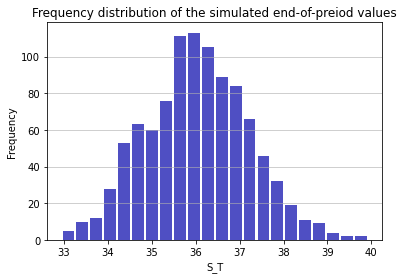

In [198]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [199]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 0.4485991113434558


In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

In [201]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [202]:
delta(36, 36, 4/52, 0.0173, 0.0426, 0.1161, 'call')

0.48073926758652524

In [203]:
delta(36, 36, 4/52, 0.0173, 0.0426, 0.1161, 'put')

-0.5159891725890564

In [204]:
S = np.linspace(25,45,5)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 36, 4/52, 0.0173, 0.0426, 0.1161, 'call')
    Delta_Put [i] = delta(S[i], 36, 4/52, 0.0173, 0.0426, 0.1161, 'put')

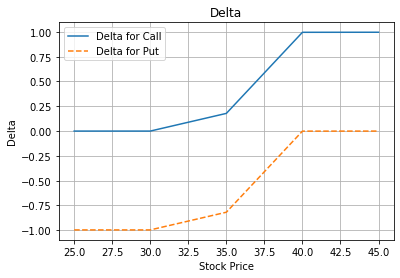

In [205]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [206]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [207]:
gamma(36, 36, 4/52, 0.0173, 0.0426, 0.1161, 'call')

0.34335405506652356

In [208]:
delta(36, 36, 4/52, 0.0173, 0.0426, 0.1161, 'put') 

-0.5159891725890564

In [209]:
S = np.linspace(25,45,5)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 36, 4/52, 0.0173, 0.0426, 0.1161, 'call')

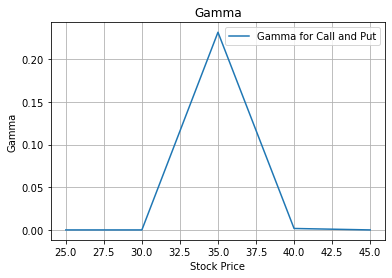

In [210]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [211]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [212]:
theta(36, 36, 4/52, 0.0173, 0.0426, 0.1161, 'call')

2.5479556802569086

In [213]:
theta(36, 36, 4/52, 0.0173, 0.0426, 0.1161, 'put')

2.5318427848156815

In [214]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(36, 36, T[i], 0.0173, 0.0426, 0.1161, 'call')
    Theta_Put [i] = theta(36, 36, T[i], 0.0173, 0.0426, 0.1161, 'put')

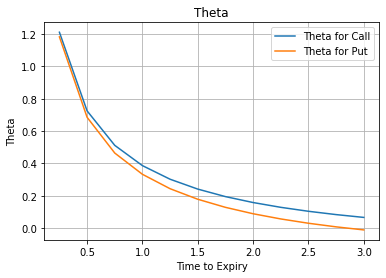

In [215]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

In [216]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [217]:
rho(36, 36, 4/52, 0.0173, 0.0426, 0.1161, 'call')

1.2984112700771298

In [218]:
rho(36, 36, 4/52, 0.0173, 0.0426, 0.1161, 'put')

-1.4671367430458009

In [219]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(36, 36, 4/52, r[i], 0.0426, 0.1161, 'call')
    Rho_Put [i] = rho(36, 36, 4/52, r[i], 0.0426, 0.1161, 'put')

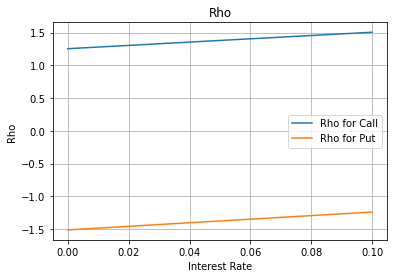

In [220]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

In [221]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [222]:
vega(36, 36, 4/52, 0.0173, 0.0426, 0.1161, 'call')

3.9663482758726007

In [223]:
vega(36, 36, 4/52, 0.0173, 0.0426, 0.1161, 'put')

3.9663482758726007

In [224]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(36, 36, 4/52, 0.0173, 0.0426, vol[i], 'call')

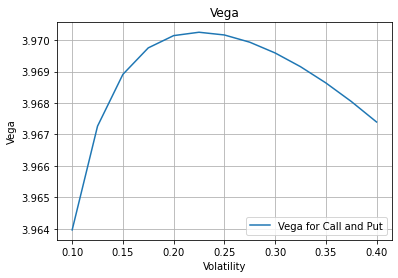

In [225]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])